<a href="https://colab.research.google.com/github/Diego-1099/Colabfiles/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#===============================================================================
#                          IMPORTACIÓN DE LIBRERÍAS
#===============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import joblib
from scipy.stats import shapiro, anderson, kstest, boxcox

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from IPython.display import display


# ***Limpieza y Transformación de Datos***

# **EDA, GRÁFICAS, TRANSFORMACIONES Y PROCESOS DE NORMALIZACIÓN**

In [3]:
#===============================================================================
#                    CARGAR EL DATASET LOANSANDLIABILITY
#===============================================================================

df = pd.read_csv('/content/drive/MyDrive/Project/Datasets/LoanData_Raw_v1.0.csv')

#===============================================================================
#                          MODIFICACIÓN DEL DATASET
#===============================================================================

# Eliminar registros con datos faltantes.
df = df.dropna()

# Eliminar el dato atípico de 'age' (136).
df = df[df['age'] != 136]
df = df[df['ed'] != 5]

# Estandarizar la columna 'default' para que solo contenga 0 y 1.
df['default'] = df['default'].replace({"'0'": 0, ":0": 0})

## CATEGORIZANDO LA VARIABLE 'ED'

education_mapping = {
    1: 'High School',
    2: 'Undergraduate',
    3: 'Graduate',
    4: 'Postgraduate'
}

df['ed'] = df['ed'].map(education_mapping)


# Estandarizar los tipos de datos.
df['age'] = df['age'].astype(int)
df['ed'] = df['ed'].astype('category')  #MODIFICAR A CATEGORICA
df['employ'] = df['employ'].astype(int)
df['address'] = df['address'].astype(int)
df['income'] = df['income'].astype(float)
df['debtinc'] = df['debtinc'].astype(float)
df['creddebt'] = df['creddebt'].astype(float)
df['othdebt'] = df['othdebt'].astype(float)
df['default'] = df['default'].astype(int)

# Redondear los valores flotantes a 4 decimales.
df[['income', 'debtinc', 'creddebt', 'othdebt']] = df[['income', 'debtinc', 'creddebt', 'othdebt']].round(4)

#===============================================================================
#                              DATASET MODIFICADO
#===============================================================================

print('-------------------------------------------------------------------------')
print('Vista previa del dataset:')
print(df.head(5))

print('-------------------------------------------------------------------------')
print('Cantidad de datos perdidos por columna:')
print(df.isnull().sum())

print('-------------------------------------------------------------------------')
print('Información general del dataset:')
df.info()

print('-------------------------------------------------------------------------')
print('Descripción estadística del dataset:')
print(df.describe())

print('-------------------------------------------------------------------------')
print("Valores únicos en la columna 'default':")
print(df['default'].unique())

print('-------------------------------------------------------------------------')
print("Frecuencia de combinaciones entre 'ed' y 'default':")
print(pd.crosstab(df['ed'], df['default']))

print('-------------------------------------------------------------------------')
print(df.value_counts(['default']))

print('-------------------------------------------------------------------------')
print(f"Valor mínimo de 'employ': {df['employ'].min()}")
print(f"Valor mínimo de 'address': {df['address'].min()}")


-------------------------------------------------------------------------
Vista previa del dataset:
   age             ed  employ  address  income  debtinc  creddebt  othdebt  \
0   41       Graduate      17       12   176.0      9.3   11.3594   5.0086   
1   27    High School      10        6    31.0     17.3    1.3622   4.0008   
4   24  Undergraduate       2        0    28.0     17.3    1.7874   3.0566   
5   41  Undergraduate       5        5    25.0     10.2    0.3927   2.1573   
8   24    High School       3        4    19.0     24.4    1.3583   3.2777   

   default  
0        1  
1        0  
4        1  
5        0  
8        1  
-------------------------------------------------------------------------
Cantidad de datos perdidos por columna:
age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64
-------------------------------------------------------------------------
Información general del da

--------------------------------------------------------------------------------




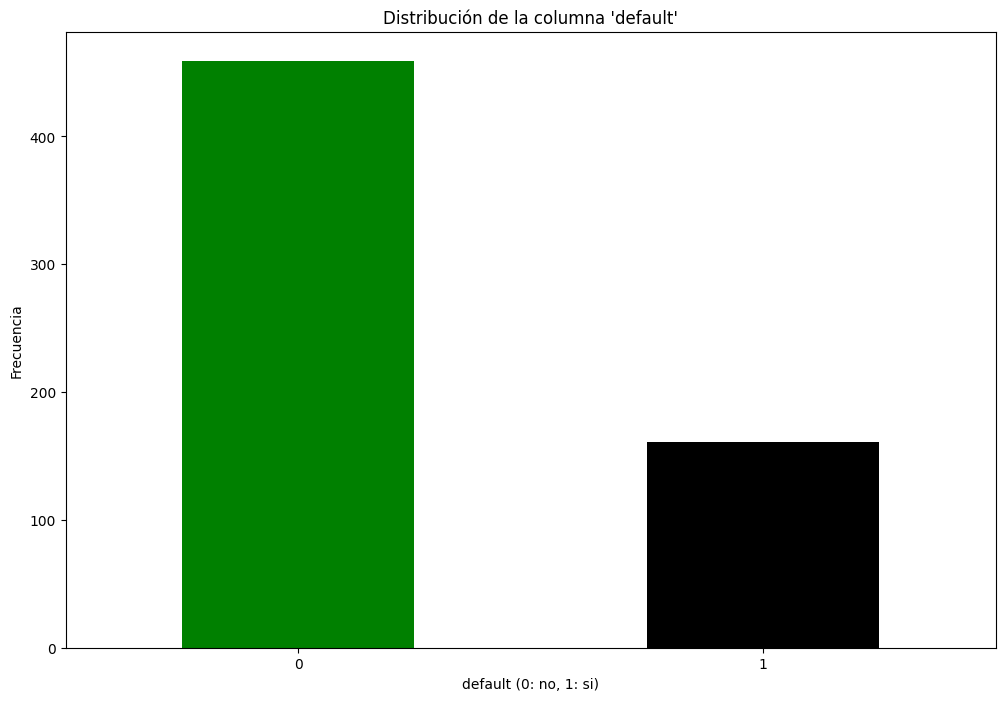



--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




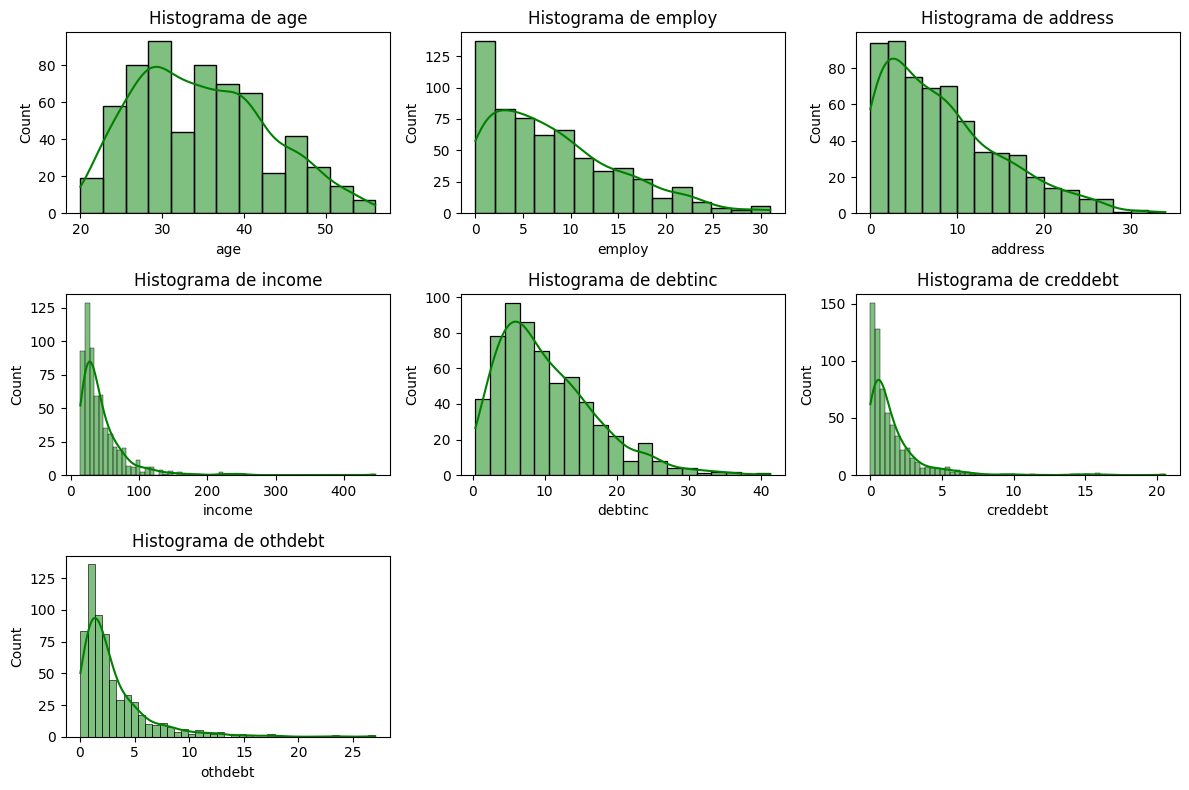



--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




,Kurtosis,Skewness
age,-0.608001,0.384387
employ,0.318535,0.895357
address,0.386506,0.949129
income,28.609349,4.089323
debtinc,1.384151,1.106902
creddebt,22.860199,4.018301
othdebt,11.287152,2.751464




--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




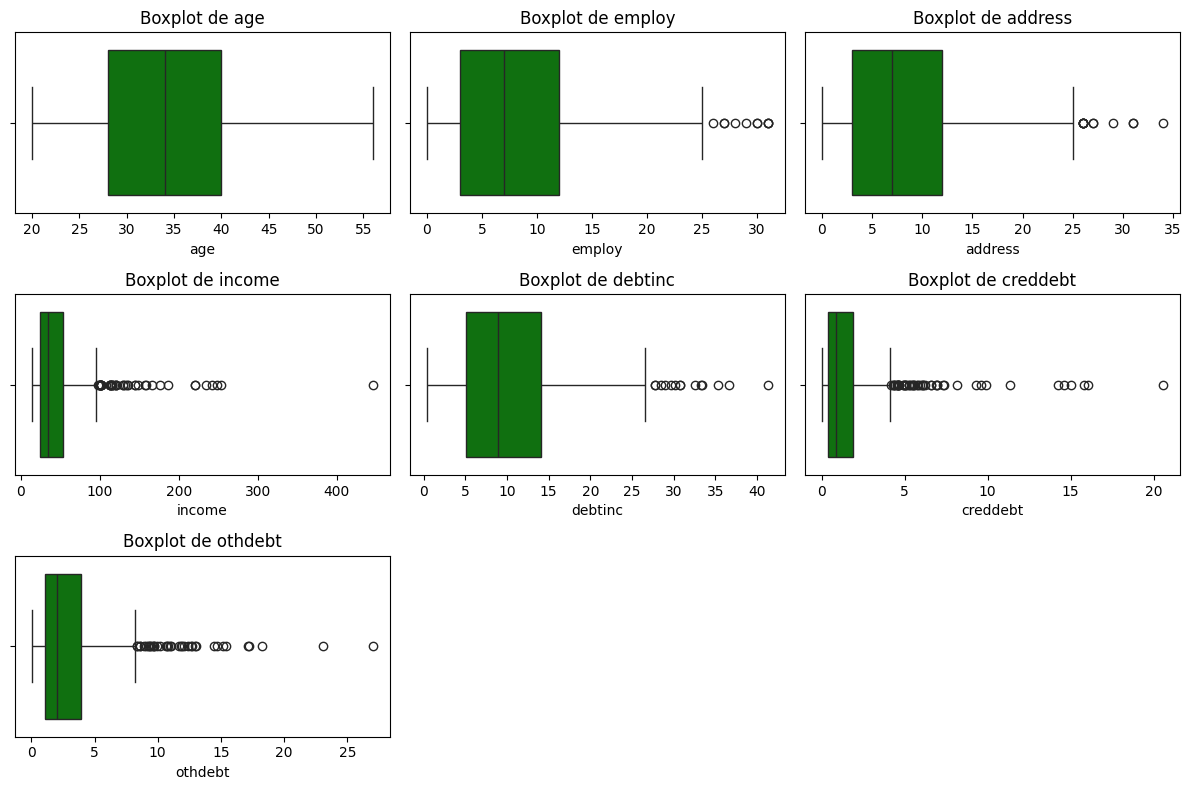



--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




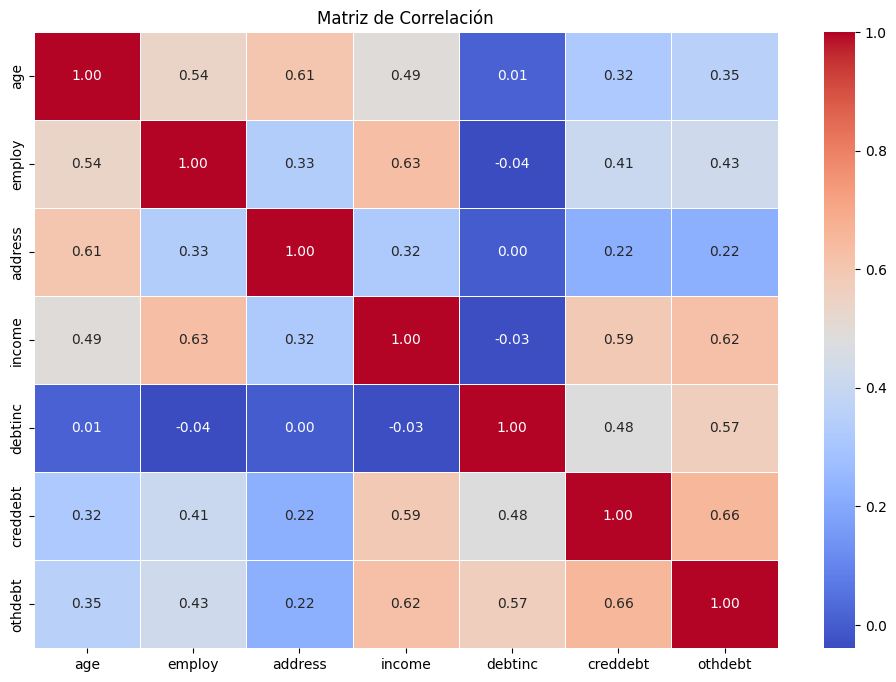



--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




--------------------------------------------------------------------------------
--------------------------------------------------------------------------------



Resultados del Test de Shapiro-Wilk:


,Variable,Estadístico,p-valor
0,age,0.973,0.0
1,employ,0.924,0.0
2,address,0.916,0.0
3,income,0.655,0.0
4,debtinc,0.924,0.0
5,creddebt,0.609,0.0
6,othdebt,0.734,0.0



Resultados de la prueba Anderson-Darling:


,Variable,Estadístico,Nivel de Significancia (%),Valor Crítico
0,age,4.394,15.0,0.572
1,age,4.394,10.0,0.652
2,age,4.394,5.0,0.782
3,age,4.394,2.5,0.912
4,age,4.394,1.0,1.085
5,employ,12.299,15.0,0.572
6,employ,12.299,10.0,0.652
7,employ,12.299,5.0,0.782
8,employ,12.299,2.5,0.912
9,employ,12.299,1.0,1.085



Resultados del Test de Kolmogorov-Smirnov:


,Variable,Estadístico,p-valor
0,age,1.000,0.0
1,employ,0.821,0.0
2,address,0.826,0.0
3,income,1.000,0.0
4,debtinc,0.931,0.0
5,creddebt,0.507,0.0
6,othdebt,0.629,0.0




--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




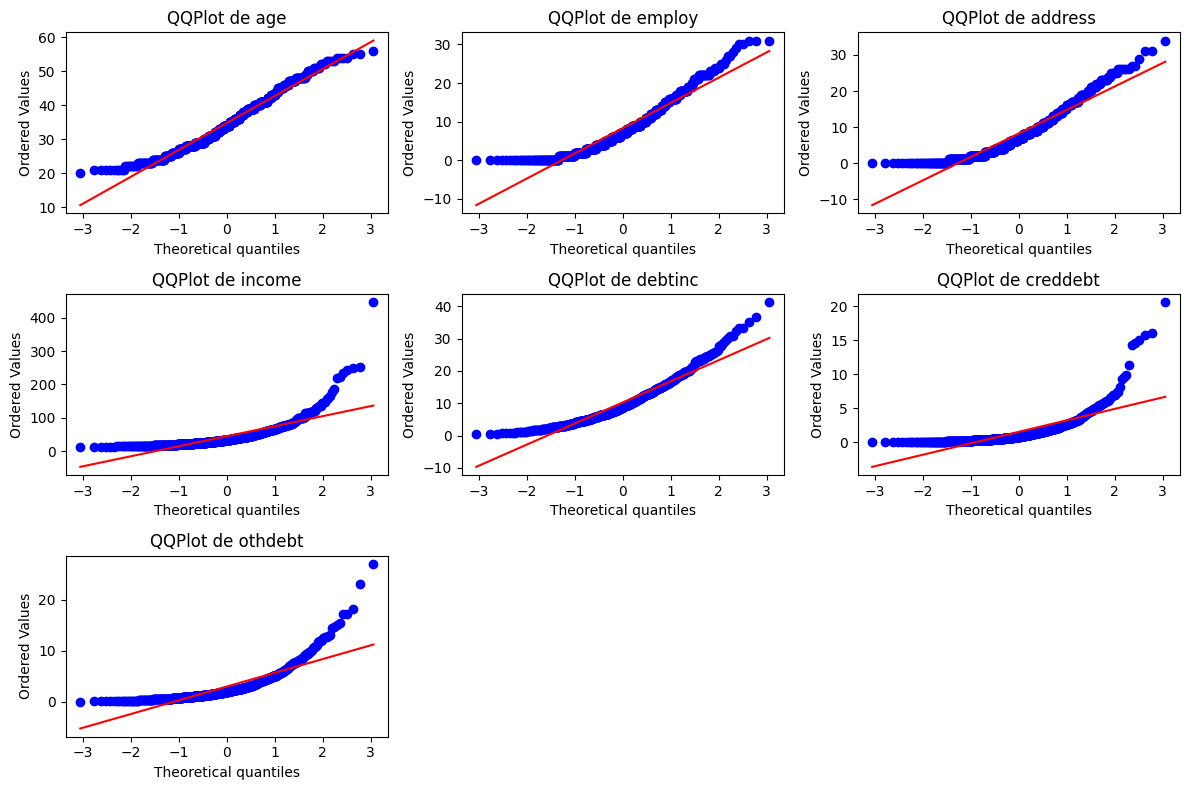



--------------------------------------------------------------------------------


In [4]:

# ******************************************************************************

#                       *** REALIZAR UN EDA COMPLETO ***

# ******************************************************************************

#===============================================================================
#            VISUALIZACIÓN: GRÁFICA DE BARRAS PARA COLUMNA ´default´
#===============================================================================

plt.figure(figsize = (12, 8))
df['default'].value_counts().plot(kind = 'bar', color = ['green', 'black'])
plt.title("Distribución de la columna 'default'")
plt.xlabel('default (0: no, 1: si)')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 0)

print('-' * 80)
print('\n')

plt.show()

print('\n')
print('-' * 80)

#===============================================================================
#                 VISUALIZACIÓN: HISTOGRAMAS COLUMNAS NUMÉRICAS
#===============================================================================

numerical_columns = df.select_dtypes(include = [np.number]).columns.tolist()
numerical_columns = [col for col in numerical_columns if col != 'default']


plt.figure(figsize = (12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde = True, color = 'green', edgecolor = 'black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
print('-' * 80)
print('\n')

plt.tight_layout()
plt.show()

print('\n')
print('-' * 80)

kurtosis_values = df[numerical_columns].kurtosis()
skewness_values = df[numerical_columns].skew()

print('-' * 80)
print('\n')

stats_df = pd.DataFrame({'Kurtosis': kurtosis_values, 'Skewness': skewness_values})
display(stats_df)

print('\n')
print('-' * 80)

#===============================================================================
#               VISUALIZACIÓN: BOXPLOTS PARA COLUMNAS NUMÉRICAS
#===============================================================================

plt.figure(figsize = (12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data = df, x = col, color = 'green')
    plt.title(f'Boxplot de {col}')

plt.tight_layout()

print('-' * 80)
print('\n')

plt.show()

print('\n')
print('-' * 80)

#===============================================================================
#              VISUALIZACIÓN: MATRIZ DE CORRELACIÓN Y MAPA DE CALOR
#===============================================================================

corr = df[numerical_columns].corr()

print('-' * 80)
print('\n')

plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Matriz de Correlación')

plt.show()

print('\n')
print('-' * 80)

#===============================================================================
#              VISUALIZACIÓN: PAIRPLOT PARA COLUMNAS NUMÉRICAS
#===============================================================================

#sns.pairplot(df[numerical_columns])

print('-' * 80)
print('\n')

plt.show()

print('\n')
print('-' * 80)

#===============================================================================
#              PRUEBAS DE NORMALIDAD (SW, AD, KS) Y QQPLOT
#===============================================================================

shapiro_results = {'Variable': [], 'Estadístico': [], 'p-valor': []}
anderson_results = {'Variable': [], 'Estadístico': [], 'Nivel de Significancia (%)': [], 'Valor Crítico': []}
ks_results = {'Variable': [], 'Estadístico': [], 'p-valor': []}

# SHAPIRO-WILK TEST

for col in numerical_columns:
    stat, p_value = shapiro(df[col].dropna())
    shapiro_results['Variable'].append(col)
    shapiro_results['Estadístico'].append(round(stat, 3))
    shapiro_results['p-valor'].append(round(p_value, 3))

df_shapiro = pd.DataFrame(shapiro_results)

# ANDERSON-DARLING TEST

for col in numerical_columns:
    result = anderson(df[col].dropna())
    for i, crit in enumerate(result.critical_values):
        anderson_results['Variable'].append(col)
        anderson_results['Estadístico'].append(round(result.statistic, 3))
        anderson_results['Nivel de Significancia (%)'].append(result.significance_level[i])
        anderson_results['Valor Crítico'].append(round(crit, 3))

df_anderson = pd.DataFrame(anderson_results)

# KOLMOGOROV-SMIRNOV TEST

for col in numerical_columns:
    stat, p_value = kstest(df[col].dropna(), 'norm')
    ks_results['Variable'].append(col)
    ks_results['Estadístico'].append(round(stat, 3))
    ks_results['p-valor'].append(round(p_value, 3))

df_ks = pd.DataFrame(ks_results)

print('-' * 80)
print('\n')

print("\nResultados del Test de Shapiro-Wilk:")
display(df_shapiro)

print("\nResultados de la prueba Anderson-Darling:")
display(df_anderson)

print("\nResultados del Test de Kolmogorov-Smirnov:")
display(df_ks)

print('\n')
print('-' * 80)

# QQPLOTS

plt.figure(figsize = (12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    stats.probplot(df[col].dropna(), dist = 'norm', plot = plt)
    plt.title(f'QQPlot de {col}')

plt.tight_layout()

print('-' * 80)
print('\n')

plt.show()

print('\n')
print('-' * 80)


La columna employ contiene valores negativos, no se puede aplicar la transformación Box-Cox.
La columna address contiene valores negativos, no se puede aplicar la transformación Box-Cox.
La columna employ contiene valores negativos, no se puede aplicar Box-Cox ni realizar pruebas.
La columna address contiene valores negativos, no se puede aplicar Box-Cox ni realizar pruebas.

Resultados Shapiro-Wilk (Original vs. Box-Cox):


,Variable,Estadístico_Original,p_Original,Estadístico_BoxCox,p_BoxCox,Lambda
0,age,0.973,0.0,0.984,0.000,0.062
1,income,0.655,0.0,0.990,0.000,-0.517
2,debtinc,0.924,0.0,0.998,0.563,0.330
3,creddebt,0.609,0.0,0.998,0.847,0.081
4,othdebt,0.734,0.0,0.998,0.810,0.097



Resultados Anderson-Darling (Estadístico):


,Variable,Estadístico_Original,Estadístico_BoxCox,Niveles_Significancia,Valores_Críticos,Interpretación_Original,Interpretación_BoxCox
0,age,4.394,2.423,"[15.0%, 10.0%, 5.0%, 2.5%, 1.0%]","[0.572, 0.652, 0.782, 0.912, 1.085]","[Rechazar H0, Rechazar H0, Rechazar H0, Rechaz...","[Rechazar H0, Rechazar H0, Rechazar H0, Rechaz..."
1,income,48.124,1.396,"[15.0%, 10.0%, 5.0%, 2.5%, 1.0%]","[0.572, 0.652, 0.782, 0.912, 1.085]","[Rechazar H0, Rechazar H0, Rechazar H0, Rechaz...","[Rechazar H0, Rechazar H0, Rechazar H0, Rechaz..."
2,debtinc,11.207,0.291,"[15.0%, 10.0%, 5.0%, 2.5%, 1.0%]","[0.572, 0.652, 0.782, 0.912, 1.085]","[Rechazar H0, Rechazar H0, Rechazar H0, Rechaz...","[No rechazar H0, No rechazar H0, No rechazar H..."
3,creddebt,60.802,0.198,"[15.0%, 10.0%, 5.0%, 2.5%, 1.0%]","[0.572, 0.652, 0.782, 0.912, 1.085]","[Rechazar H0, Rechazar H0, Rechazar H0, Rechaz...","[No rechazar H0, No rechazar H0, No rechazar H..."
4,othdebt,43.015,0.345,"[15.0%, 10.0%, 5.0%, 2.5%, 1.0%]","[0.572, 0.652, 0.782, 0.912, 1.085]","[Rechazar H0, Rechazar H0, Rechazar H0, Rechaz...","[No rechazar H0, No rechazar H0, No rechazar H..."



Resultados Kolmogorov-Smirnov (Original vs. Box-Cox):


,Variable,Estadístico_Original,p_Original,Estadístico_BoxCox,p_BoxCox,Interpretación_Original,Interpretación_BoxCox
0,age,1.000,0.0,1.000,0.0,Rechazar H0,Rechazar H0
1,income,1.000,0.0,0.925,0.0,Rechazar H0,Rechazar H0
2,debtinc,0.931,0.0,0.809,0.0,Rechazar H0,Rechazar H0
3,creddebt,0.507,0.0,0.102,0.0,Rechazar H0,Rechazar H0
4,othdebt,0.629,0.0,0.280,0.0,Rechazar H0,Rechazar H0


--------------------------------------------------------------------------------




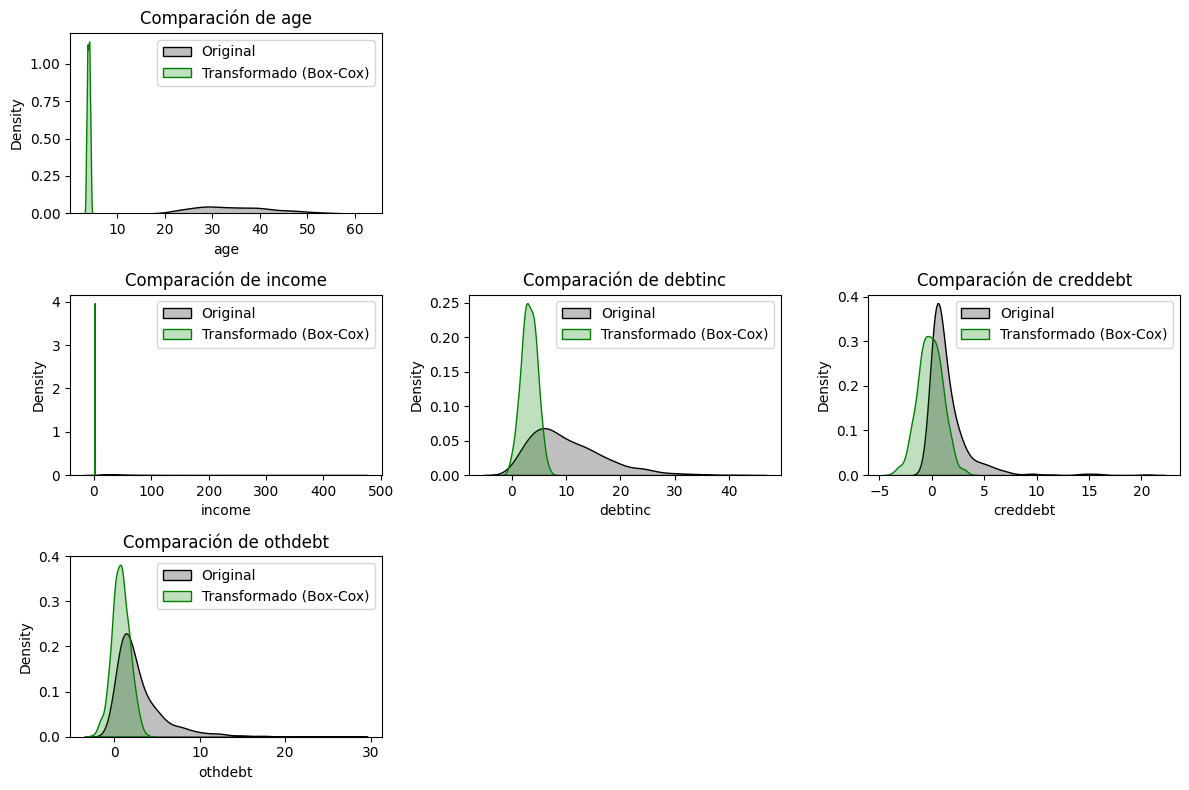

--------------------------------------------------------------------------------




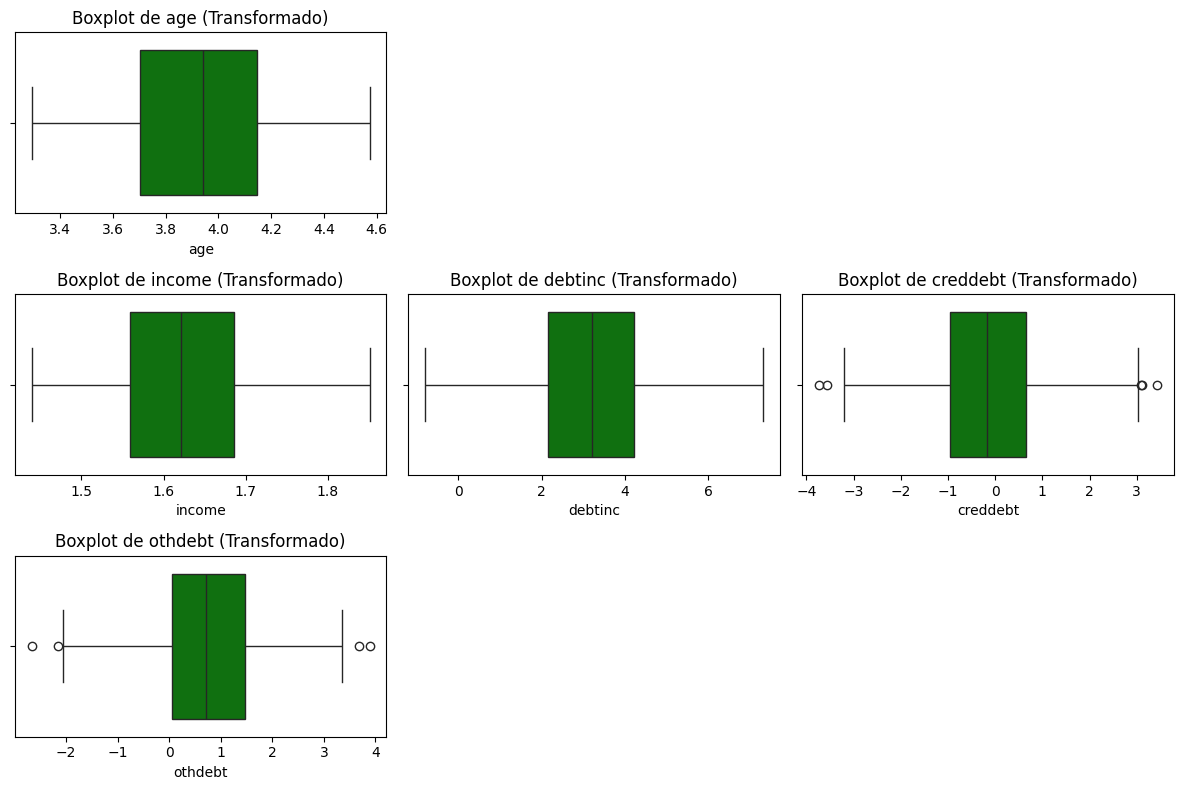

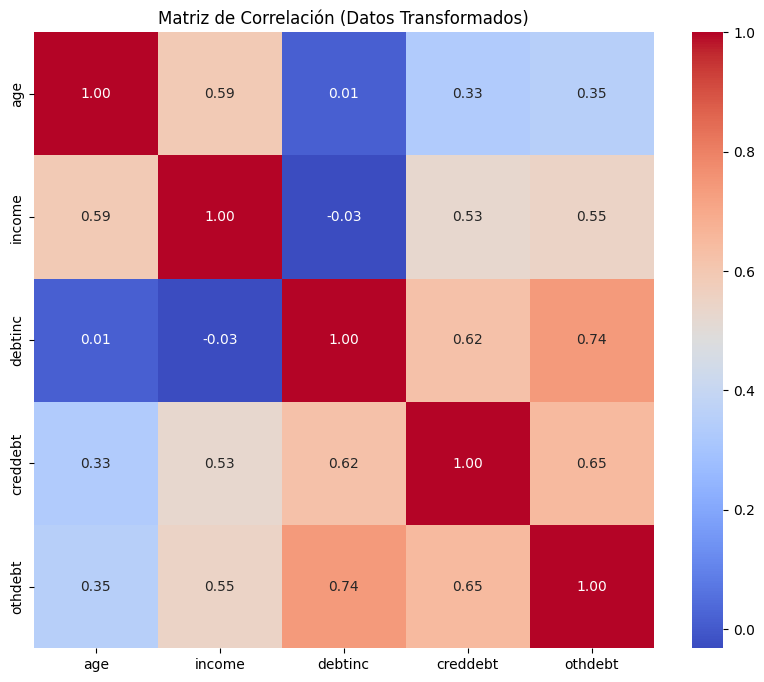

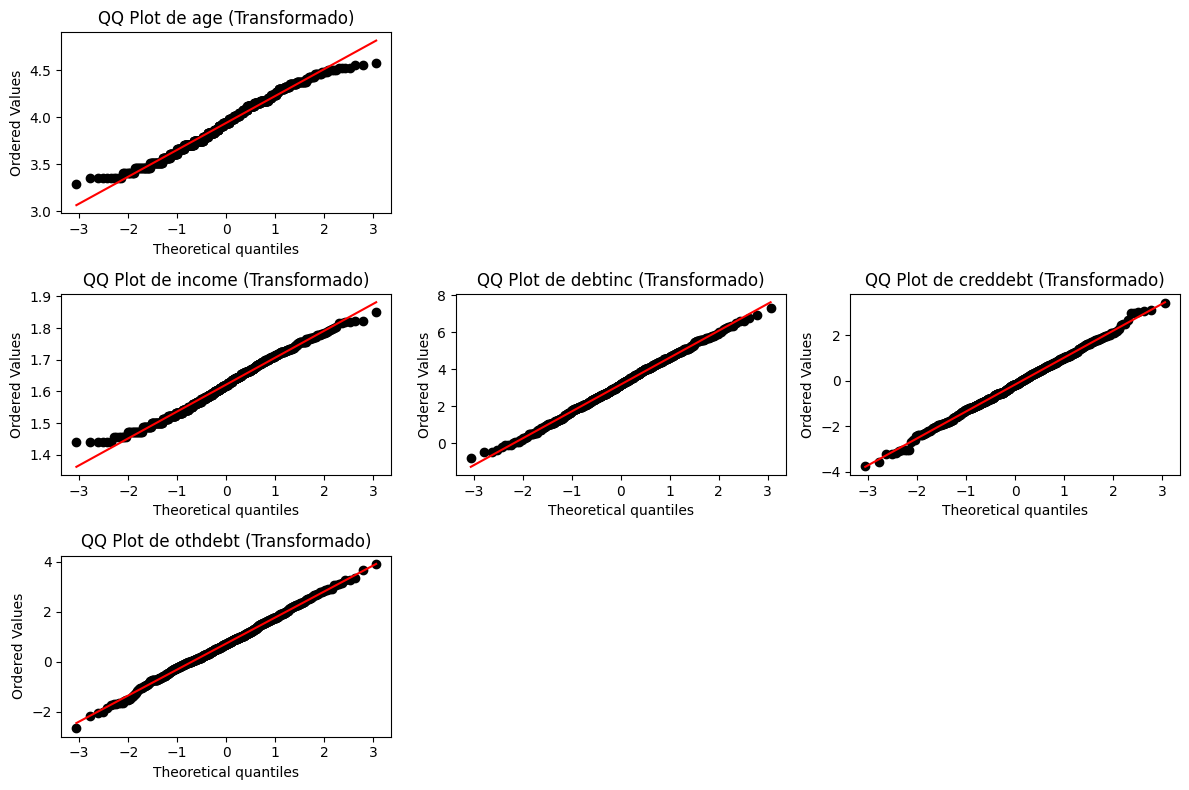

In [5]:
#===============================================================================

#                            TRANSFORMACIÓN BOXCOX

#===============================================================================

transformed_data = {}
lambdas = {}

for col in numerical_columns:
    if df[col].min() > 0:
        transformed_data[col], lambda_value = boxcox(df[col].dropna())
        lambdas[col] = lambda_value
    else:
        print(f'La columna {col} contiene valores negativos, no se puede aplicar la transformación Box-Cox.')


#===============================================================================
#                 PRUEBAS DE NORMALIDAD SOBRE DATOS ORI Y TRANS
#===============================================================================

shapiro_df = {'Variable': [], 'Estadístico_Original': [], 'p_Original': [], 'Estadístico_BoxCox': [], 'p_BoxCox': [], 'Lambda': []}
anderson_df = {'Variable': [], 'Estadístico_Original': [], 'Estadístico_BoxCox': [], 'Niveles_Significancia': [], 'Valores_Críticos': [], 'Interpretación_Original': [], 'Interpretación_BoxCox': []}
ks_df = {'Variable': [], 'Estadístico_Original': [], 'p_Original': [], 'Estadístico_BoxCox': [], 'p_BoxCox': [], 'Interpretación_Original': [], 'Interpretación_BoxCox': []}

for col in numerical_columns:
    if df[col].min() > 0:
        original = df[col].dropna()
        transformed = transformed_data[col]

        # Shapiro-Wilk

        stat_orig, p_orig = shapiro(original)
        stat_box, p_box = shapiro(transformed)

        shapiro_df['Variable'].append(col)
        shapiro_df['Estadístico_Original'].append(round(stat_orig, 3))
        shapiro_df['p_Original'].append(round(p_orig, 3))
        shapiro_df['Estadístico_BoxCox'].append(round(stat_box, 3))
        shapiro_df['p_BoxCox'].append(round(p_box, 3))
        shapiro_df['Lambda'].append(round(lambdas[col], 3))

        # Anderson-Darling

        a_orig = anderson(original)
        a_box = anderson(transformed)

        niveles_significancia = a_orig.significance_level
        valores_criticos = a_orig.critical_values

        # Interpretación de Anderson-Darling
        anderson_interpret_orig = ['Rechazar H0' if a_orig.statistic > crit else 'No rechazar H0' for crit in valores_criticos]
        anderson_interpret_box = ['Rechazar H0' if a_box.statistic > crit else 'No rechazar H0' for crit in valores_criticos]

        anderson_df['Variable'].append(col)
        anderson_df['Estadístico_Original'].append(round(a_orig.statistic, 3))
        anderson_df['Estadístico_BoxCox'].append(round(a_box.statistic, 3))
        anderson_df['Niveles_Significancia'].append([f"{nivel}%" for nivel in niveles_significancia])
        anderson_df['Valores_Críticos'].append([round(valor, 3) for valor in valores_criticos])
        anderson_df['Interpretación_Original'].append(anderson_interpret_orig)
        anderson_df['Interpretación_BoxCox'].append(anderson_interpret_box)

        # Kolmogorov-Smirnov

        ks_stat_orig, ks_p_orig = kstest(original, 'norm')
        ks_stat_box, ks_p_box = kstest(transformed, 'norm')

        # Interpretación de Kolmogorov-Smirnov
        ks_interpret_orig = 'Rechazar H0' if ks_p_orig < 0.05 else 'No rechazar H0'
        ks_interpret_box = 'Rechazar H0' if ks_p_box < 0.05 else 'No rechazar H0'

        ks_df['Variable'].append(col)
        ks_df['Estadístico_Original'].append(round(ks_stat_orig, 3))
        ks_df['p_Original'].append(round(ks_p_orig, 3))
        ks_df['Estadístico_BoxCox'].append(round(ks_stat_box, 3))
        ks_df['p_BoxCox'].append(round(ks_p_box, 3))
        ks_df['Interpretación_Original'].append(ks_interpret_orig)
        ks_df['Interpretación_BoxCox'].append(ks_interpret_box)

    else:
        print(f"La columna {col} contiene valores negativos, no se puede aplicar Box-Cox ni realizar pruebas.")

# Convertir a DataFrames
df_shapiro = pd.DataFrame(shapiro_df)
df_anderson = pd.DataFrame(anderson_df)
df_ks = pd.DataFrame(ks_df)

# Mostrar los resultados como tablas
print("\nResultados Shapiro-Wilk (Original vs. Box-Cox):")
display(df_shapiro)

print("\nResultados Anderson-Darling (Estadístico):")
display(df_anderson)

print("\nResultados Kolmogorov-Smirnov (Original vs. Box-Cox):")
display(df_ks)

#===============================================================================
#                           GRÁFICAS DE COMPARACIÓN
#===============================================================================

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_columns, 1):
    if df[col].min() > 0:
        plt.subplot(3, 3, i)

        # GRÁFICAR LOS DATOS ORIGINALES
        sns.kdeplot(df[col], color='black', label='Original', fill=True)

        # GRÁFICAR LOS DATOS TRANSFORMADOS
        sns.kdeplot(transformed_data[col], color='green', label='Transformado (Box-Cox)', fill=True)

        plt.title(f'Comparación de {col}')
        plt.legend()

plt.tight_layout()

print('-' * 80)
print('\n')

plt.show()

print('-' * 80)
print('\n')

# ******************************************************************************

#                                  *** EDA ***

# ******************************************************************************

#===============================================================================
#               VISUALIZACIÓN: BOXPLOTS PARA COLUMNAS NUMÉRICAS
#===============================================================================

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_columns, 1):
    if df[col].min() > 0:
        plt.subplot(3, 3, i)

        sns.boxplot(x=transformed_data[col], color='green')

        plt.title(f'Boxplot de {col} (Transformado)')
        plt.xlabel(f'{col}')

plt.tight_layout()
plt.show()

#===============================================================================
#              VISUALIZACIÓN: MATRIZ DE CORRELACIÓN Y MAPA DE CALOR
#===============================================================================

correlacion_bc = pd.DataFrame(transformed_data).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_bc, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación (Datos Transformados)')
plt.show()

#===============================================================================
#              PRUEBAS DE NORMALIDAD (SW, AD, KS) Y QQPLOT
#===============================================================================

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_columns, 1):
    if df[col].min() > 0:
        plt.subplot(3, 3, i)

        stats.probplot(transformed_data[col], dist="norm", plot=plt)

        plt.title(f'QQ Plot de {col} (Transformado)')
        plt.gca().get_lines()[0].set_color('black')


plt.tight_layout()
plt.show()


# **ADASYN**

--------------------------------------------------------------------------------



Distribución después de ADASYN:


,Cantidad
default,
0,413
1,404




--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




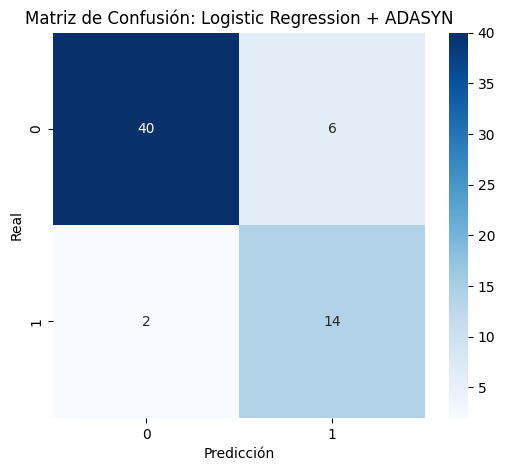



--------------------------------------------------------------------------------
--------------------------------------------------------------------------------



Reporte de clasificación: Logistic Regression + ADASYN


,precision,recall,f1-score,support
0,0.952381,0.869565,0.909091,46.000000
1,0.700000,0.875000,0.777778,16.000000
accuracy,0.870968,0.870968,0.870968,0.870968
macro avg,0.826190,0.872283,0.843434,62.000000
weighted avg,0.887250,0.870968,0.875204,62.000000




--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




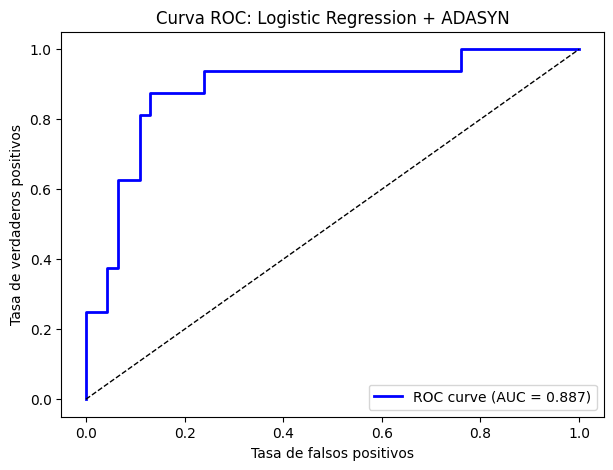



--------------------------------------------------------------------------------
--------------------------------------------------------------------------------



Resultados con Logistic Regression + ADASYN:



,Modelo,Accuracy,Precision (1),Recall (1),F1-Score (1),ROC-AUC
0,Logistic Regression + ADASYN,0.870968,0.7,0.875,0.777778,0.887228




--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


['modelo_logistic_adasyn.pkl']
['columnas_entrenamiento.pkl']


--------------------------------------------------------------------------------


In [14]:
# ==============================================================================
# DATOS
# ==============================================================================
X = df.drop("default", axis=1)
y = df["default"]

# Codificando variables numéricas
X = pd.get_dummies(X, columns=["ed"], drop_first = True)
columnas_entrenamiento = X.columns.tolist()

# ==============================================================================
# SPLIT + ADASYN (Test size = 0.10)
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)

adasyn = ADASYN(random_state = 42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

print('-' * 80)
print('\n')

print("\nDistribución después de ADASYN:")
display(y_res.value_counts().to_frame(name = 'Cantidad'))

print('\n')
print('-' * 80)

# ==============================================================================
# ENTRENAMIENTO MODELO: Logistic Regression
# ==============================================================================
model = LogisticRegression(max_iter = 1000, random_state = 42)
model.fit(X_res, y_res)

# ==============================================================================
# PREDICCIONES
# ==============================================================================
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# ==============================================================================
# VISUALIZACIÓN: MATRIZ DE CONFUSIÓN
# ==============================================================================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = [0, 1], yticklabels = [0, 1])
plt.xlabel('Predicción')
plt.ylabel('Real')

print('-' * 80)
print('\n')

plt.title('Matriz de Confusión: Logistic Regression + ADASYN')
plt.show()

print('\n')
print('-' * 80)

# ==============================================================================
# VISUALIZACIÓN: REPORTE DE CLASIFICACIÓN
# ==============================================================================

print('-' * 80)
print('\n')

print("\nReporte de clasificación: Logistic Regression + ADASYN")
display(pd.DataFrame(classification_report(y_test, y_pred, output_dict = True, zero_division = 0)).T)

print('\n')
print('-' * 80)

# ==============================================================================
# VISUALIZACIÓN: CURVA ROC
# ==============================================================================
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (7, 5))
plt.plot(fpr, tpr, color = 'blue', lw = 2, label = f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color = 'black', lw = 1, linestyle = '--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC: Logistic Regression + ADASYN')
plt.legend(loc='lower right')

print('-' * 80)
print('\n')

plt.show()

print('\n')
print('-' * 80)

# ==============================================================================
# VISUALIZACIÓN: MÉTRICAS RESUMEN
# ==============================================================================
results_df = pd.DataFrame([{
    "Modelo": "Logistic Regression + ADASYN",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision (1)": precision_score(y_test, y_pred, pos_label = 1),
    "Recall (1)": recall_score(y_test, y_pred, pos_label = 1),
    "F1-Score (1)": f1_score(y_test, y_pred, pos_label = 1),
    "ROC-AUC": roc_auc
}])

print('-' * 80)
print('\n')

print("\nResultados con Logistic Regression + ADASYN:\n")
display(results_df)

print('\n')
print('-' * 80)

# ==============================================================================
# GUARDADO DEL MODELO Y CONFIGURACIÓN
# ==============================================================================

print('-' * 80)
print('\n')

print(joblib.dump(model, "modelo_logistic_adasyn.pkl"))
print(joblib.dump(columnas_entrenamiento, "columnas_entrenamiento.pkl"))

print('\n')
print('-' * 80)



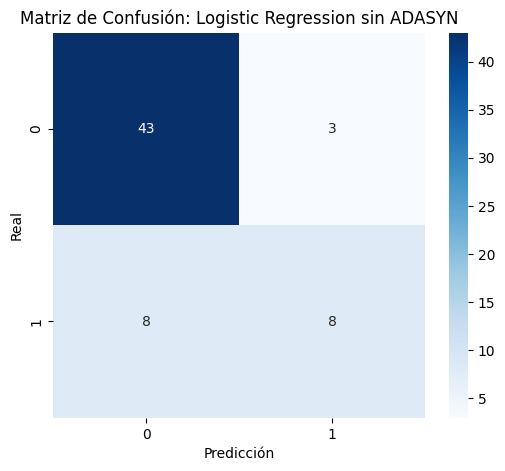


Reporte de clasificación: Logistic Regression sin ADASYN
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        46
           1       0.73      0.50      0.59        16

    accuracy                           0.82        62
   macro avg       0.79      0.72      0.74        62
weighted avg       0.81      0.82      0.81        62



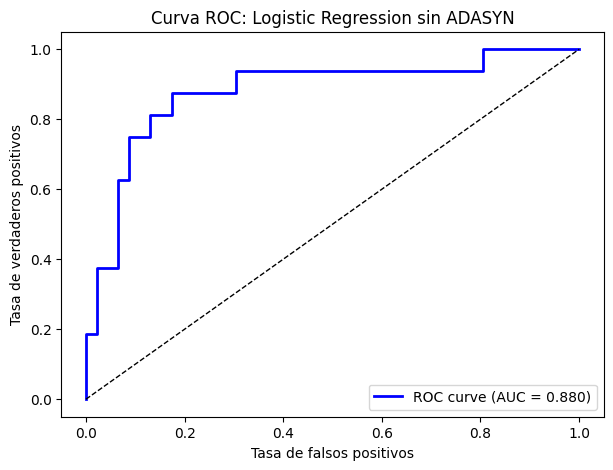

,Modelo,Accuracy,Precision (1),Recall (1),F1-Score (1),ROC-AUC
0,Logistic Regression sin ADASYN,0.822581,0.727273,0.5,0.592593,0.880435


In [7]:
# ==============================================================================
# SPLIT (Test size = 0.10) - SIN ADASYN
# ==============================================================================

X_train_na, X_test_na, y_train_na, y_test_na = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)

# ==============================================================================
# ENTRENAMIENTO MODELO: Logistic Regression sin balanceo
# ==============================================================================

model_na = LogisticRegression(max_iter = 1000, random_state = 42)
model_na.fit(X_train_na, y_train_na)

# ==============================================================================
# PREDICCIONES
# ==============================================================================

y_pred_na = model_na.predict(X_test_na)
y_proba_na = model_na.predict_proba(X_test_na)[:, 1]

# ==============================================================================
# MATRIZ DE CONFUSIÓN
# ==============================================================================

cm_na = confusion_matrix(y_test_na, y_pred_na)
plt.figure(figsize = (6, 5))
sns.heatmap(cm_na, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = [0, 1], yticklabels = [0, 1])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión: Logistic Regression sin ADASYN')
plt.show()

# ==============================================================================
# REPORTE DE CLASIFICACIÓN
# ==============================================================================

print("\nReporte de clasificación: Logistic Regression sin ADASYN")
print(classification_report(y_test_na, y_pred_na, zero_division = 0))

# ==============================================================================
# CURVA ROC
# ==============================================================================

fpr_na, tpr_na, _ = roc_curve(y_test_na, y_proba_na)
roc_auc_na = auc(fpr_na, tpr_na)

plt.figure(figsize = (7, 5))
plt.plot(fpr_na, tpr_na, color = 'blue', lw = 2, label = f'ROC curve (AUC = {roc_auc_na:.3f})')
plt.plot([0, 1], [0, 1], color = 'black', lw = 1, linestyle = '--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC: Logistic Regression sin ADASYN')
plt.legend(loc='lower right')
plt.show()

# ==============================================================================
# MÉTRICAS RESUMEN
# ==============================================================================

results_na_df = pd.DataFrame([{
    "Modelo": "Logistic Regression sin ADASYN",
    "Accuracy": accuracy_score(y_test_na, y_pred_na),
    "Precision (1)": precision_score(y_test_na, y_pred_na, pos_label=1),
    "Recall (1)": recall_score(y_test_na, y_pred_na, pos_label=1),
    "F1-Score (1)": f1_score(y_test_na, y_pred_na, pos_label=1),
    "ROC-AUC": roc_auc_na
}])

display(results_na_df)


# **FUNCIÓN**

In [8]:
# ==============================================================================
# MODELO Y COLUMNAS ENTRENADAS
# ==============================================================================

modelo = joblib.load("modelo_logistic_adasyn.pkl")
columnas_entrenamiento = joblib.load("columnas_entrenamiento.pkl")

# ==============================================================================

In [9]:
# ==============================================================================
# FUNCIÓN PARA PREDICCIÓN
# ==============================================================================

def predecir_nuevo(input_df, modelo, columnas_entrenamiento):

    input_df_encoded = pd.get_dummies(input_df, columns=["ed"], drop_first=True)

    # Alinear columnas con las del entrenamiento
    for col in columnas_entrenamiento:
        if col not in input_df_encoded.columns:
            input_df_encoded[col] = 0

    input_df_encoded = input_df_encoded[columnas_entrenamiento]

    # Predicción
    pred = modelo.predict(input_df_encoded)
    proba = modelo.predict_proba(input_df_encoded)[:, 1]

    # Resultado
    resultado = pd.DataFrame({
        "Predicción (default)": pred,
        "Probabilidad de default": proba
    })

    display(resultado)
    return resultado

# ==============================================================================

In [10]:
# ==============================================================================
# FUNCIÓN PARA GRÁFICAR RESULTADOS
# ==============================================================================

def visualizar_resultados(df_result):
    plt.figure(figsize = (12, 6))
    sns.scatterplot(
        x=range(len(df_result)),
        y=df_result["Probabilidad de default"],
        hue=df_result["Predicción (default)"],
        palette={0: "green", 1: "red"},
        s = 100
    )
    plt.axhline(0.5, color = 'black', linestyle = '--', label = 'Umbral 0.5')
    plt.title("Probabilidad de default por aplicante")
    plt.xlabel("Índice del aplicante")
    plt.ylabel("Probabilidad de default")
    plt.legend(title = "Predicción")
    plt.show()

# ==============================================================================

# **PRUEBAS**

,Predicción (default),Probabilidad de default
0,0,0.409136


   Predicción (default)  Probabilidad de default
0                     0                 0.409136


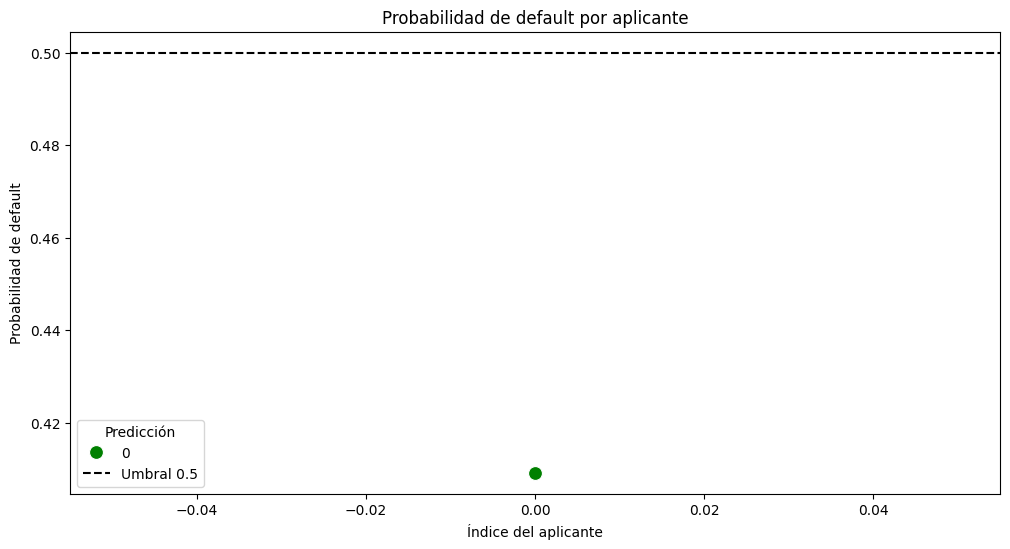

In [11]:
# ==========================================
# EJEMPLO DE USO - NUEVO CLIENTE
# ==========================================

nuevo_cliente = pd.DataFrame({
    "Age": [35],
    "employ": [5],
    "address": [3],
    "income": [55.0],
    "debtinc": [18.5],
    "creddebt": [3.2],
    "othdebt": [6.5],
    "ed": ["Graduate"]
})

resultado = predecir_nuevo(nuevo_cliente, modelo, columnas_entrenamiento)
print(resultado)
visualizar_resultados(resultado)

,Predicción (default),Probabilidad de default
0,1,0.509530
1,0,0.002096
2,1,0.656839
3,0,0.000501
4,1,0.599579
5,0,0.032642
6,0,0.003684
7,0,0.000027
8,0,0.000002
9,0,0.026388


    Predicción (default)  Probabilidad de default
0                      1                 0.509530
1                      0                 0.002096
2                      1                 0.656839
3                      0                 0.000501
4                      1                 0.599579
5                      0                 0.032642
6                      0                 0.003684
7                      0                 0.000027
8                      0                 0.000002
9                      0                 0.026388
10                     0                 0.177397
11                     0                 0.004785
12                     0                 0.155535
13                     0                 0.001111
14                     1                 0.954716


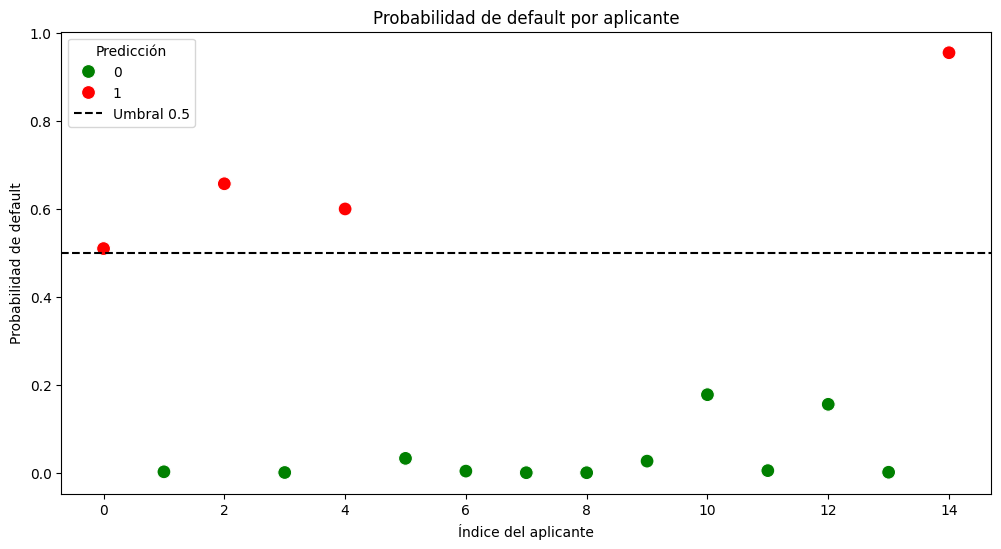

In [12]:
# Ejemplo de 15 aplicantes con datos variados
data_15_applicants = {
    "Age": [25, 40, 30, 50, 28, 33, 45, 55, 60, 38, 29, 42, 35, 48, 27],
    "employ": [2, 10, 5, 20, 3, 7, 15, 25, 30, 9, 4, 12, 6, 18, 1],
    "address": [1, 5, 3, 10, 2, 4, 8, 15, 12, 6, 3, 7, 4, 9, 1],
    "income": [35, 60, 45, 80, 38, 50, 70, 90, 100, 55, 40, 65, 48, 75, 33],
    "debtinc": [0.3, 0.2, 0.4, 0.15, 0.35, 0.25, 0.18, 0.12, 0.1, 0.22, 0.38, 0.2, 0.3, 0.15, 0.4],
    "creddebt": [2, 0, 4, 1, 3, 2, 1, 0, 0, 1, 3, 0, 2, 1, 5],
    "othdebt": [0, 1, 0, 2, 0, 1, 1, 3, 2, 1, 0, 1, 0, 2, 0],
    "ed": ["High School", "Graduate", "Undergraduate", "Postgraduate", "High School",
           "Graduate", "Undergraduate", "Postgraduate", "Graduate", "High School",
           "Graduate", "Undergraduate", "Postgraduate", "High School", "Undergraduate"]
}

df_15_applicants = pd.DataFrame(data_15_applicants)

resultado_15_applicants = predecir_nuevo(df_15_applicants, modelo, columnas_entrenamiento)
print(resultado_15_applicants)
visualizar_resultados(resultado_15_applicants)
